In [1]:
import networkx as nx
import pandas as pd

In [7]:
flights_df =  pd.read_csv('german_airline_connection_costs.csv', usecols=[0, 1, 2])
graph = nx.from_pandas_edgelist(flights_df, source='Source', target='Target')

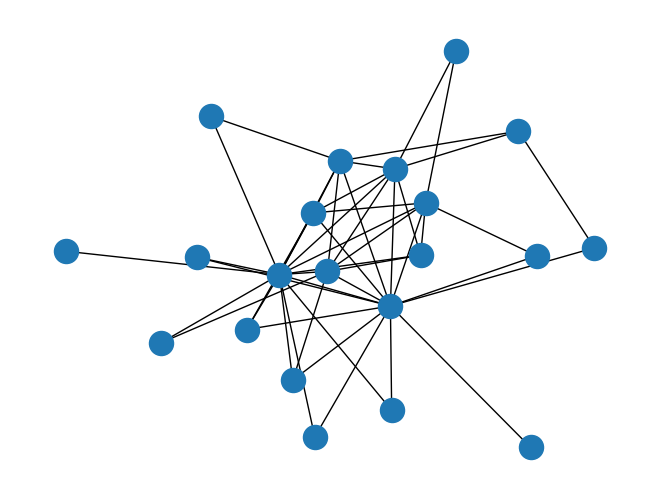

In [10]:
list(nx.connected_components(graph))

[{'BER',
  'BRE',
  'CGN',
  'DRS',
  'DTM',
  'DUS',
  'FDH',
  'FMO',
  'FRA',
  'GWT',
  'HAJ',
  'HAM',
  'HDF',
  'LBC',
  'LEJ',
  'MHG',
  'MUC',
  'NUE',
  'PAD',
  'SCN',
  'STR'}]